In [1]:
from models import DSTP, SSP, DMC, StandardDDM
from models import runsimulations, modelrecovery
import multiprocessing.pool as mpp
import sys
import json
import pandas as pd
import numpy as np
import numba as nb


In [ ]:
#DSTP
dstp = DSTP()
runsimulations.run_simulations([dstp], 1, 1, 'S1FlankerData.csv', return_dataframes=True)

PARTICIPANT 1
run 1
1
differential_evolution step 1: f(x)= 6404.17
alpha: 0.7671620008211075; beta: 0.12639981246859067; p: 0.9415622589085555; sd_0: 5.980639323887226; sd_r: 77.91865348894143; tau: 1.9790138089499147; 
2.6906695216074508
Polishing solution with 'L-BFGS-B'
0.7671620008211075, 0.12639981246859067, 0.9415622589085555, 5.980639323887226, 77.91865348894143, 1.9790138089499147
 X^2 = 6404.173194406539
run 2
2
0.7671620008211075, 0.12639981246859067, 0.9415622589085555, 5.980639323887226, 77.91865348894143, 1.9790138089499147
 X^2 = 6404.173194406539
{'cdfs': [0.1, 0.3, 0.5, 0.7, 0.9], 'cafs': [0.25, 0.5, 0.75], 'cdf_props_congruent': [0.09404761904761905, 0.18809523809523807, 0.1880952380952381, 0.18809523809523804, 0.18809523809523815, 0.09404761904761902], 'cdf_props_incongruent': [0.09389880952380952, 0.18779761904761902, 0.18779761904761905, 0.187797619047619, 0.1877976190476191, 0.0938988095238095], 'caf_props_congruent': [0.03571428571428571, 0.01488095238095238, 0.00

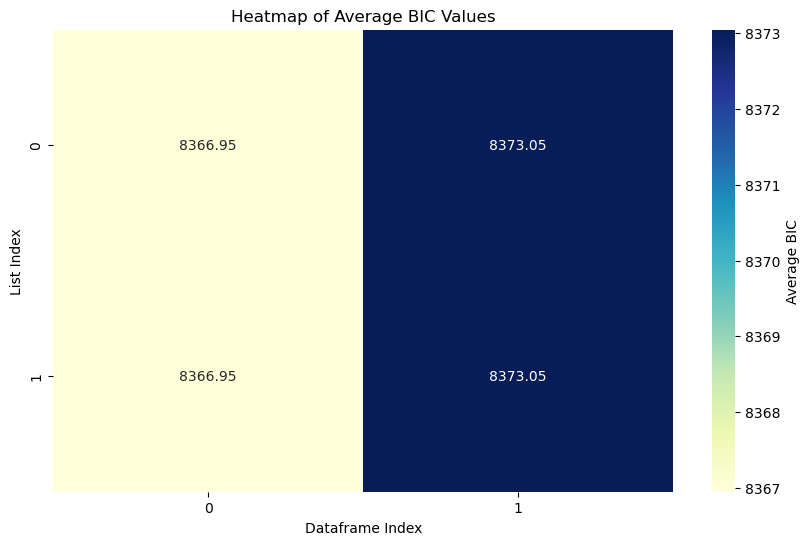

In [2]:
ssp = SSP()
dmc = DMC()
modelrecovery.model_recovery([ssp, dmc])